<a href="https://colab.research.google.com/github/12Brainer/matematica-algebra-lineal-s4/blob/main/Trabajo_Pr%C3%A1ctico_s4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matemática para Ciencia de los Datos
# Trabajo Práctico 3

Profesor: Juan Luis Crespo Mariño (basado en trabajo previo de Luis Alexánder Calvo Valverde)

Instituto Tecnológico de Costa Rica,

Programa Ciencia de Datos

---

Fecha de entrega: 20 de mayo de 2025, a más tardar a las 6:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ).

Estudiante:
1. **Brainer Fallas Prado**


---

**Pregunta 1**



Se puede demostrar que para los vectores generadores de un subespacio $E=\textrm{espacioGenerado}\left\{ \vec{v}_{1},\vec{v}_{2},\ldots,\vec{v}_{m}\right\}$ , con $V=\left[\vec{v}_{1},\vec{v}_{2},\ldots,\vec{v}_{m}\right]$,con $\vec{v}_{m}\in\mathbb{R}^{n}$ si son ortonormales, la ecuación de la proyección de un vector $\vec{u}\in\mathbb{R}^{n}$ originalmente dada por:

$$\textrm{proy}\left(\vec{u};V\right)=\textrm{argmin}_{\vec{v}\in E}\left\Vert \vec{v}-\vec{u}\right\Vert _{2}=V\,\left(V^{T}V\right)^{-1}V^{T}\vec{u}$$

se puede reescribir como:

$$\textrm{proy}\left(\vec{u};V\right)=\textrm{argmin}_{\vec{v}\in E}\left\Vert \vec{v}-\vec{u}\right\Vert _{2}=V\,V^{T}\vec{u}$$

con $V\in\mathbb{R}^{n\times m}$.









**1.1 (25 puntos)**

Utilizando numpy, proponga una matriz ortonormal de dimensiones 3x3, para ello utilice una fuente como "Proceso de ortonormalización de  Gram - Schmidt" (https://blog.nekomath.com/algebra-lineal-i-proceso-de-gram-schmidt/) para producir una matriz ortonormal a partir de una matriz que no es ni ortonormal ni ortogonal.

Finalmente muestre en numpy que su matriz resultante es ortonormal ($V$).



In [ ]:
import numpy as np
from numpy import linalg as LA
from numpy.linalg import matrix_rank, inv, pinv, norm
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# crear una matriz 3x3 que NO sea ortonormal ni ortogonal
A = np.array([[1., 1., 0.],
              [1., 0., 1.],
              [0., 1., 1.]])

#mostrar que A no es ortogonal
AAT = np.matmul(A, np.transpose(A))
identity = np.eye(3)
print("Producto de matriz A por su transpuesta")
print(AAT)
print("A es ortogonal?:", np.allclose(AAT, identity))

#mostrar que A no es ortonormal por método de las normas
#debe ser 1 si son normalizadas
print("Normas de A:")
v1 = A[:, 0]
v2 = A[:, 1]
v3 = A[:, 2]

print("||v1|| normalizado?=", LA.norm(v1)==1.0)
print("||v2|| normalizado?=", LA.norm(v2)==1.0)
print("||v3|| normalizado?=", LA.norm(v3)==1.0)
print("="*100)


# aplicar el proceso de Gram-Schmidt
V = np.zeros_like(A)
for i in range(A.shape[0]):
    vi = A[i].copy()
    for j in range(i):
        temp = np.dot(vi, V[j]) * V[j]
        vi -= temp
    V[i] = vi/np.linalg.norm(vi)


# mostrar la matriz ortonormal resultante V
VVT = np.matmul(V, np.transpose(V))
identity = np.eye(3)
print("Producto de matriz V por su transpuesta")
print(VVT)
print("V es ortogonal?", np.allclose(VVT, identity))
print("Matriz ortonormal V:")
print(V)

# mostrar que V es ortonormal
print("Normas de V:")
v1 = V[:, 0]
v2 = V[:, 1]
v3 = V[:, 2]

print("||v1|| normalizado?=", LA.norm(v1)==1.0)
print("||v2|| normalizado?=", LA.norm(v2)==1.0)
print("||v3|| normalizado?=", LA.norm(v3)==1.0)



Producto de matriz A por su transpuesta
[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]
A es ortogonal?: False
Normas de A:
||v1|| normalizado?= False
||v2|| normalizado?= False
||v3|| normalizado?= False
Producto de matriz V por su transpuesta
[[ 1.00000000e+00  1.03018891e-16  7.33073441e-17]
 [ 1.03018891e-16  1.00000000e+00 -1.03593182e-16]
 [ 7.33073441e-17 -1.03593182e-16  1.00000000e+00]]
V es ortogonal? True
Matriz ortonormal V:
[[ 0.70710678  0.70710678  0.        ]
 [ 0.40824829 -0.40824829  0.81649658]
 [-0.57735027  0.57735027  0.57735027]]
Normas de V:
||v1|| normalizado?= True
||v2|| normalizado?= True
||v3|| normalizado?= True


**1.2 (15 puntos)**

Proponga un vector $\vec{u}$ y programe en numpy las operaciones algebraicas siguientes (tome $V$ del paso anterior).

$V\,\left(V^{T}V\right)^{-1}V^{T}\vec{u}$

y,

$V\,V^{T}\vec{u}$


In [ ]:
# Vector u
u = np.array([[1.], [3.], [2.]])

# Proyección con fórmula general
def projectInvertible(u, A):
    At = np.transpose(A)
    invMatrix = LA.inv(np.matmul(At, A))
    return np.matmul(np.matmul(np.matmul(A, invMatrix), At), u)


proy1 = projectInvertible(u, V)

# Proyección con fórmula ortonormal
#transpuesta de V
t_V = np.transpose(V)
proy2 = np.matmul(np.matmul(V,t_V), u)
print(proy2)

# Imprimir resultados
print("Proyección con fórmula general:")
print(proy1)

print("\nProyección con fórmula ortonormal:")
print(proy2)

# Verificar si son iguales
iguales = np.allclose(proy1, proy2, )
print("\n¿Son iguales las proyecciones?", iguales)


[[1.]
 [3.]
 [2.]]
Proyección con fórmula general:
[[1.]
 [3.]
 [2.]]

Proyección con fórmula ortonormal:
[[1.]
 [3.]
 [2.]]

¿Son iguales las proyecciones? True


**1.3 (10 puntos)**

Programe en python para calcular el error de proyección obtenido para los casos del punto **1.2**.

In [ ]:
# Función para calcular el error de proyección
def calculateProjectionError(proy, u):
    return LA.norm(proy - u, 2)

u_col = u.reshape(-1, 1)

# Calcular errores
error1 = calculateProjectionError(proy1, u)
error2 = calculateProjectionError(proy2, u)

# Imprimir errores
print("Error de proyección (fórmula general):", error1)
print("Error de proyección (fórmula ortonormal):", error2)

Error de proyección (fórmula general): 3.1401849173675503e-16
Error de proyección (fórmula ortonormal): 1.0175362097255204e-15


---

**Pregunta 2 (10 puntos)**


Programe en python la función calculeDet2, que recibe como parámetro una matriz cuadrada de dimensiones 2x2, llamada M, y retorna el determinante de esa matriz. Usted debe programar las operaciones matemáticas necesarias, no utilizar una función tipo det para calcularla. Pruébela con dos matrices que Usted proponga.

def calculeDet2( M ):





In [ ]:
# Función que calcula el determinante de una matriz 2x2
def calculeDet2(M):
    # Tomamos los valores de la matriz manualmente
    a = M[0][0]
    b = M[0][1]
    c = M[1][0]
    d = M[1][1]

    # Usamos la fórmula del determinante: ad - bc
    determinante = a * d - b * c

    return determinante

#matrices de muestra
# Matriz 1
M1 = np.array([[2., 7.], [-1., 1.]])
M2 = np.array([[5., 7.], [2., 2.]])

# Calculamos determinantes con nuestra función
det1 = calculeDet2(M1)
det2 = calculeDet2(M2)
print("Determinante de M1:", det1)
print("Determinante de M2:", det2)

#determinantes con numpy
det1_numpy = np.linalg.det(M1)
det2_numpy = np.linalg.det(M2)

#comparaciones de resultados aplicando redondeos
print(np.allclose([det1], [det1_numpy]))
print(np.allclose([det2], [det2_numpy]))





Determinante de M1: 9.0
Determinante de M2: -4.0
True
True


---

**Pregunta 3 (10 puntos)**


Programe en python la función calculeDet3, que recibe como parámetro una matriz cuadrada de dimensiones 3x3, llamada M, y retorna el determinante de esa matriz. Usted debe programar las operaciones matemáticas necesarias, no utilizar una función de numpy tipo det para calcularla (sí puede usar función que programó en la **Pregunta 2**). Pruébela con dos matrices que Usted proponga.

def calculeDet3( M ):






In [ ]:
# Función que calcula el determinante de una matriz 3x3
def calculeDet3(M):
    a = M[0][0]
    b = M[0][1]
    c = M[0][2]
    d = M[1][0]
    e = M[1][1]
    f = M[1][2]
    g = M[2][0]
    h = M[2][1]
    i = M[2][2]

    # Usamos la fórmula del determinante para 3x3
    determinante = a*(e*i - f*h) - b*(d*i - f*g) + c*(d*h - e*g)

    return determinante

# Probamos con dos matrices

# Matriz 1
M1 = np.array([[1, 2, 3],
               [0, 1, 4],
               [5, 6, 0]])

# Matriz 2
M2 = np.array([[2, -3, 1],
               [2, 0, -1],
               [1, 4, 5]])

# Calculamos los determinantes con la función previamente definida
det1 = calculeDet3(M1)
det2 = calculeDet3(M2)
print("Determinante de M1:", det1)
print("Determinante de M2:", det2)

#comparando con los determinantes de numpy aplicando redondeos
det1_numpy = LA.det(M1)
det2_numpy = LA.det(M2)

print(np.allclose([det1], [det1_numpy]))
print(np.allclose([det2], [det2_numpy]))

Determinante de M1: 1
Determinante de M2: 49
True
True


---

**Pregunta 4 (15 puntos)**

Se tiene que:

$$\textrm{det}\left(A\,B\right)=\textrm{det}\left(A\right)\,\textrm{det}\left(B\right)$$

Proponga dos matrices de 4x4 ( $A$ e $B$) y programando en numpy muestre esta igualdad (puede usar de numpy las funciones det y la de multiplicar matrices).






In [ ]:
#matriz A
A = np.array(
    [
        [1,3,1,4],
        [3,9,5,15],
        [0,2,1,1],
        [0,4,2,3]
    ]
)

#matriz B
B = np.array(
    [
        [1,2,3,4],
        [-1,2,0,5],
        [0,4,-2,6],
        [2,4,0,6]
    ]
)

#determinante de A*B
detAB = LA.det(np.matmul(A,B))
print("Valor en el lado izquierdo de la ecuación:", detAB)

#determinante de A
detA = LA.det(A)

#determinante de B
detB = LA.det(B)

#producto de determinantes de A y B
dets = detA * detB
print("Valor en el lado derecho de la ecuación:", dets)

#comparacion entre los determinantes aplicando redondeos
print("Resultados comparación:")
son_iguales = np.allclose([detAB], [dets])
print("Son iguales? ", son_iguales)



Valor en el lado izquierdo de la ecuación: 127.99999999999827
Valor en el lado derecho de la ecuación: 127.99999999999991
Resultados comparación:
Son iguales?  True


---

**Pregunta 5 (15 puntos)**


Utilizando el archivo "Dataset_usar.csv", haga:
- Cargue el archivo.
- Muestre cuántas filas por cuántas columnas tiene el conjunto de datos.
- Utilizando el modelo $Ax=b$
    - Conforme la matriz $A$ con todas las columnas menos la última de la derecha.
    - Conforme el vector $b$ con la última columna de la derecha.
    - Calcule el vector de pesos ($x$), utilizando el concepto de mínimos cuadrados $\left(A^{T}A\right)^{-1}A^{T}\vec{b}$
    - Calcule un b_estimado con $A$ e $x$
    - Calcule la norma 2 de la diferencia entre b y b_estimado.
    - Grafique b y b_estimado.



Filas del dataset:  998
Columnas del dataset:  9
Columnas matriz A:  8
La matriz tiene inversa
Vector de pesos x:  [-0.5        -0.14386635  0.1252491   0.03648526  0.62511504  0.12102967
  0.5         1.25      ]
Vector b estimado:
[ 7.97481282e-01  3.19710278e-01  8.81613550e-02  1.33928100e-01
  8.91888386e-01  1.14527701e-01  8.00513376e-01  1.08532643e+00
  1.73261610e-01  2.61946484e-01  2.47073913e-01  2.25942765e-01
  1.71787890e-01  9.19493398e-01  9.71549408e-01  1.00140373e+00
  2.99595633e-01  4.89271393e-01  1.31790551e+00  1.05178624e-01
  1.13096546e-01  1.72546272e-01  3.09579200e-01  8.33782950e-01
  8.25695732e-01  1.43729129e-01  8.29988499e-02  8.34968082e-01
  9.39991523e-01  1.83566732e-01  8.75989415e-02  7.34323038e-02
  8.95916291e-01  2.39530412e-01  1.14399689e-01  7.73689254e-02
  1.07774042e+00  8.43725006e-02  8.03713190e-02  1.48712513e-01
  2.50426518e-01  8.63876145e-02  9.21626510e-01  1.03612822e+00
  4.80267793e-01  1.38934640e-01  1.20151452e+00  1.

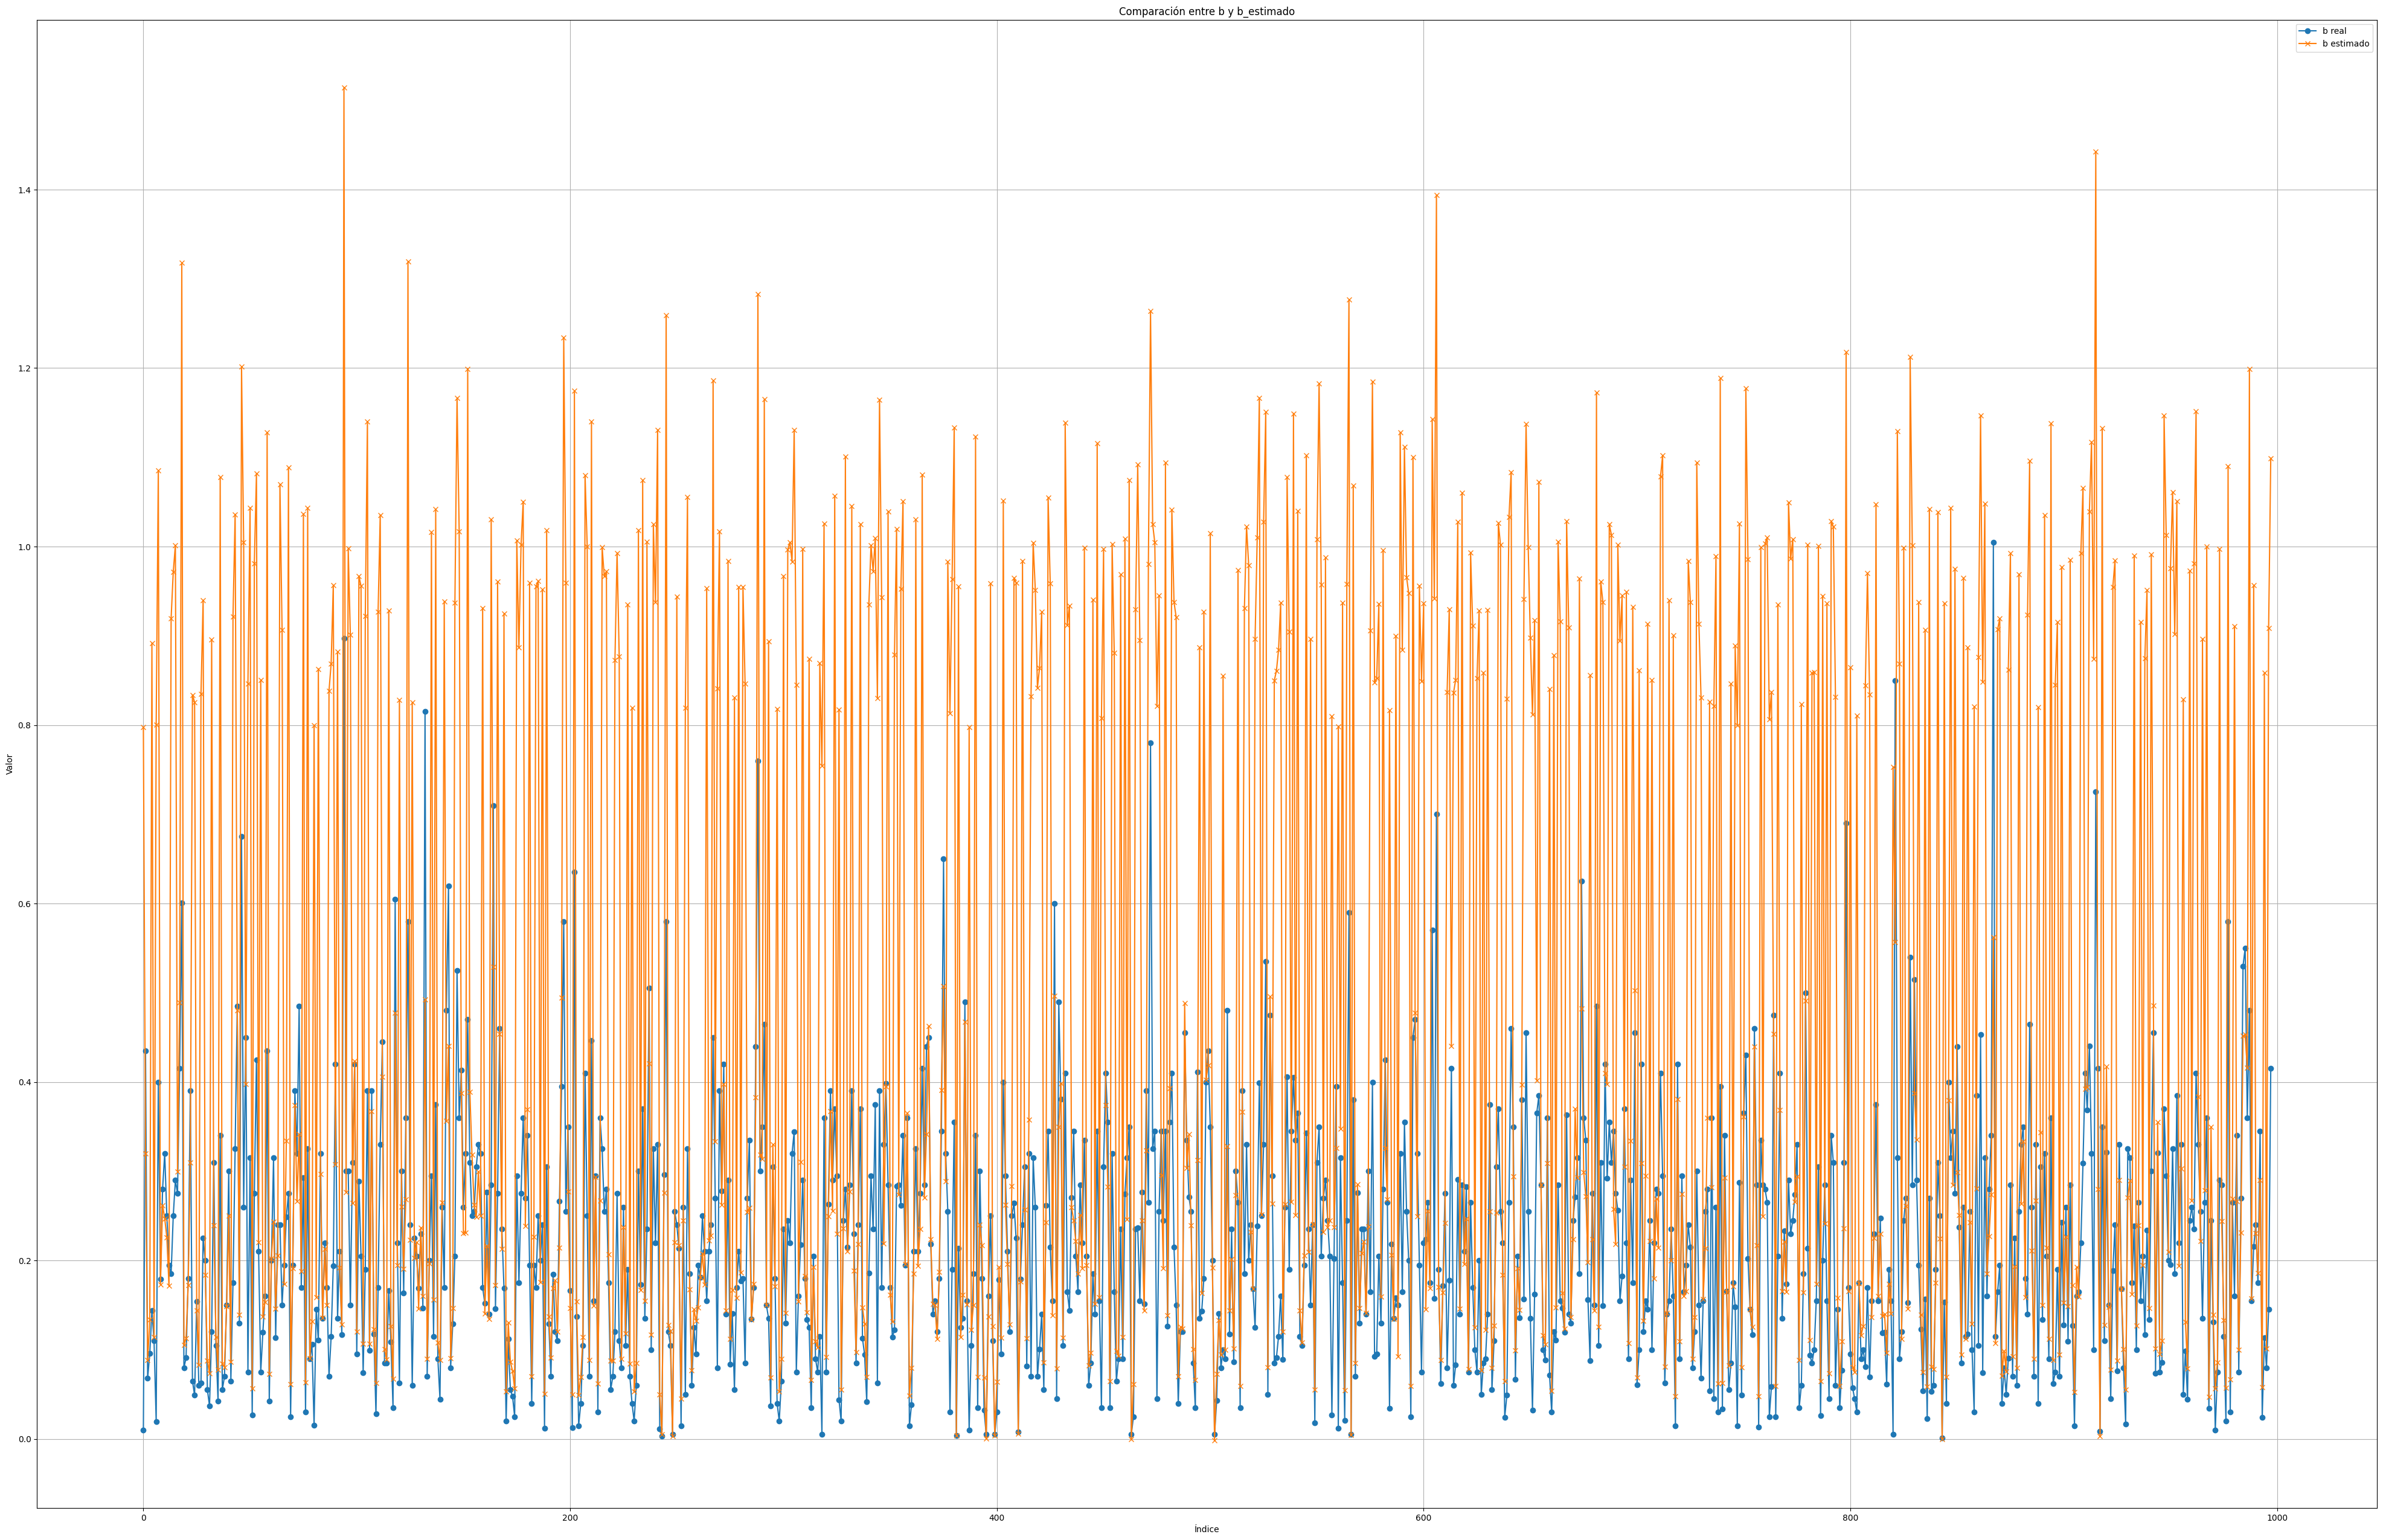

In [ ]:
# carga archivos
csv_data = "Dataset_usar.csv"
df = pd.read_csv(csv_data, header = 0, delimiter=';')


#convertimos a matriz de numpy
datos = pd.DataFrame(df).to_numpy()

print("Filas del dataset: ", datos.shape[0])
print("Columnas del dataset: ", datos.shape[1])


# En cada vector columna hay un atributo
# El atributo1 está en datos[:,0]
# El atributo2 está en datos[:,1]
#datos[:,2]
# y así sucesivamente

#crear matriz A
A = datos[:,:-1]
print("Columnas matriz A: ", A.shape[1])

#seleccionar ultima columna
b = datos[:,-1]

#calcular vector x
At = np.transpose(A)
AtA = np.matmul(At, A)
# print(AtA)
Atb = np.matmul(np.transpose(A), b)

#validar cálculo de matriz inversa de AtA
inv_AtA = None
try:
    inv_AtA = LA.inv(AtA)
    print("La matriz tiene inversa")
except:
  print("La matriz no tiene inversa")
  #calcular pseudoInversa de matriz A
  inv_AtA = LA.pinv(AtA)
  # print(pinv_A)

#crear vector de pesos x
x = np.matmul(inv_AtA, Atb)
print("Vector de pesos x: ", x)


#calcular b_estimado
b_estimado = np.matmul(A, x)
print("Vector b estimado:")
print(b_estimado)
print(100*'=')


#vector diferencia entre b y b_estimado
print("Vector diferencia entre b y b_estimado:")
diff = b - b_estimado
print(diff)
print(100*'=')

#calcular norma 2 a vector de diferencias
print("Norma 2 de la diferencia entre b y b_estimado:")
norm_2 = norm(diff, 2)
print(norm_2)
print(100*'=')


# Graficar
plt.figure(figsize=(50, 32))
plt.plot(b, label='b real', marker='o')
plt.plot(b_estimado, label='b estimado', marker='x')
plt.title('Comparación entre b y b_estimado')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)


